# Taylor Problem 16.14 version A

We'll plot at various times a wave $u(x,t)$ that is defined by its initial shape at $t=0$ from $x=0$ to $x=L$, using a Fourier sine series to write the result at a general time t: 

$\begin{align}
  u(x,t) = \sum_{n=1}^{\infty} B_n \sin(k_n x)\cos(\omega_n t)
  \;,
\end{align}$

with $k_n = n\pi/L$ and $\omega_n = k_n c$, where $c$ is the wave speed.   Here the coefficients are given by

$\begin{align}
  B_n = \frac{2}{L}\int_0^L u(x,0) \sin\frac{n\pi x}{L} \, dx
  \;.
\end{align}$

* Created 28-Mar-2019. Last revised 30-Mar-2019 by Dick Furnstahl (furnstahl.1@osu.edu).
* This version sums only over odd n, which are called $m = 2n + 1$.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

First define functions for the $t=0$ wave function form (here a triangle) and for the subsequent shape at any time $t$ based on the wave speed `c_wave`.

In [3]:
def B_coeff(m):
    """Fourier coefficient for the n = 2*m + 1 term in the expansion.
    """
    temp = 2.*m + 1
    return (-1)**m * 8. / (temp * np.pi)**2 

In [4]:
def k(m, L):
    """Wave number for n = 2*m + 1.
    """
    return (2.*m + 1.) * np.pi / L

In [5]:
def u_triangular(x_pts, t, m_max=20, c_wave=1., L=1.):
    """Returns the wave from the sum of Fourier components.  
    """
    y_pts = np.zeros(len(x_pts))  # define y_pts as the same size as x_pts
    for m in np.arange(m_max):
        y_pts += B_coeff(m) * np.sin(k(m, L) * x_pts) \
                  * np.cos(k(m, L) * c_wave * t) 
    return y_pts

First look at the initial ($t=0$) wave form.

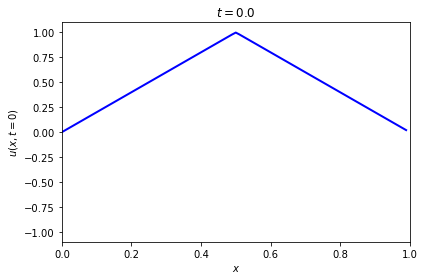

In [22]:
L = 1.
m_max = 20
c_wave = 1
omega_1 = np.pi * c_wave / L
tau = 2.*np.pi / omega_1

# Set up the array of x points (whatever looks good)
x_min = 0.
x_max = L
delta_x = 0.01
x_pts = np.arange(x_min, x_max, delta_x)

# Make a figure showing the initial wave.
t_now = 0.

fig = plt.figure(figsize=(6,4), num='Standing wave')
ax = fig.add_subplot(1,1,1)
ax.set_xlim(x_min, x_max)
gap = 0.1
ax.set_ylim(-1. - gap, 1. + gap)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u(x, t=0)$')
ax.set_title(rf'$t = {t_now:.1f}$')

m_test = 100
line, = ax.plot(x_pts, 
                u_triangular(x_pts, t_now, m_test, c_wave, L), 
                color='blue', lw=2)

fig.tight_layout()


Next make some plots at an array of time points.

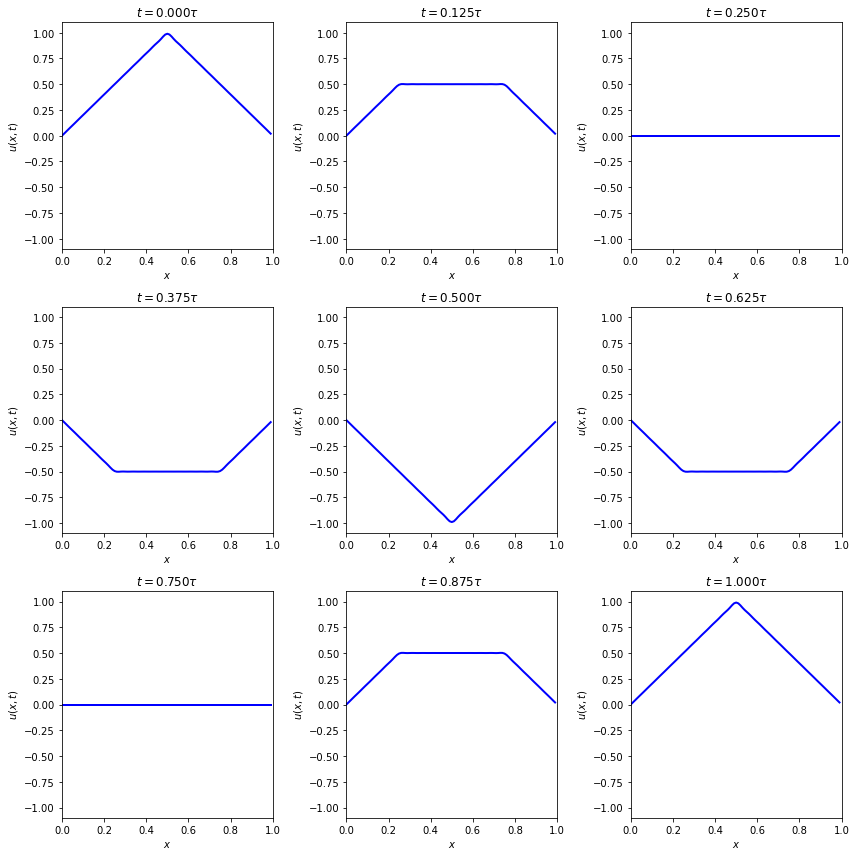

In [23]:
t_array = tau * np.arange(0., 1.125, .125)

fig_array = plt.figure(figsize=(12,12), num='Standing wave')

for i, t_now in enumerate(t_array): 
    ax_array = fig_array.add_subplot(3, 3, i+1)
    ax_array.set_xlim(x_min, x_max)
    gap = 0.1
    ax_array.set_ylim(-1. - gap, 1. + gap)
    ax_array.set_xlabel(r'$x$')
    ax_array.set_ylabel(r'$u(x, t)$')
    ax_array.set_title(rf'$t = {t_now/tau:.3f}\tau$')

    ax_array.plot(x_pts, 
                  u_triangular(x_pts, t_now, m_max, c_wave, L), 
                  color='blue', lw=2)

fig_array.tight_layout()
fig_array.savefig('Taylor_Problem_16p14.png', 
                   bbox_inches='tight')  

Now it is time to animate!

In [24]:
# Set up the t mesh for the animation.  The maximum value of t shown in
#  the movie will be t_min + delta_t * frame_number
t_min = 0.   # You can make this negative to see what happens before t=0!
t_max = 2.*tau
delta_t = t_max / 100.
t_pts = np.arange(t_min, t_max + delta_t, delta_t)

We use the cell "magic" `%%capture` to keep the figure from being shown here.  If we didn't the animated version below would be blank.

In [25]:
%%capture

fig_anim = plt.figure(figsize=(6,3), num='Triangular wave')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min, x_max)
gap = 0.1
ax_anim.set_ylim(-1. - gap, 1. + gap)

# By assigning the first return from plot to line_anim, we can later change
#  the values in the line.
line_anim, = ax_anim.plot(x_pts, 
                          u_triangular(x_pts, t_min, m_max, c_wave, L), 
                          color='blue', lw=2)

fig_anim.tight_layout()

In [26]:
def animate_wave(i):
    """This is the function called by FuncAnimation to create each frame,
        numbered by i.  So each i corresponds to a point in the t_pts
        array, with index i.
    """
    t = t_pts[i]
    y_pts = u_triangular(x_pts, t, m_max, c_wave, L) 

    line_anim.set_data(x_pts, y_pts)  # overwrite line_anim with new points
    return (line_anim,)   # this is needed for blit=True to work

In [27]:
frame_interval = 80.  # time between frames
frame_number = 101    # number of frames to include (index of t_pts)
anim = animation.FuncAnimation(fig_anim, 
                               animate_wave, 
                               init_func=None,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=True,
                               repeat=False)


In [28]:
HTML(anim.to_jshtml())  # animate using javascript
